In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
df = pd.read_excel('Natural_Gas_Spot_Price .xlsx')
df.head()

,Day,Henry Hub Natural Gas Spot Price Dollars per Million Btu
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [3]:
# Rename multiple columns in one go with a larger dictionary
df= df.rename(
    columns={
        "Henry Hub Natural Gas Spot Price Dollars per Million Btu": "gas price",
        "Day": "date"
    }
)
df.head()

,date,gas price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [4]:
df = df.set_index('date')
df = df.sort_index()
df.head()

,gas price
date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


In [5]:
df.isnull().sum()

gas price    1
dtype: int64

In [6]:
df = df.fillna(method ='pad') # filling the missing values with previous ones 
df.isnull().sum()

gas price    0
dtype: int64

In [7]:
# Creating 7 and 21 days Moving Average
df['ma7'] = df['gas price'].rolling(window=7).mean()
df['ma21'] = df['gas price'].rolling(window=21).mean()
    
# Creating MACD
df['26_ema'] = df['gas price'].ewm(span=26).mean().fillna(0)
df['12_ema'] = df['gas price'].ewm(span=12).mean().fillna(0)
df['macd'] = df['12_ema'] - df['26_ema']


# Creating Bollinger Bands
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['gas price'].rolling(window).mean()
rolling_std = df['gas price'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
#B['Rolling Mean'] = rolling_mean.fillna(0)
df['Bollinger High'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
df['Bollinger Low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)

# Creating Exponential moving average
df['ema'] = df['gas price'].ewm(com=0.5).mean()
    
# Creating Momentum
df['momentum'] = df['gas price']-1

df.head()
   

,gas price,ma7,ma21,26_ema,12_ema,macd,Bollinger High,Bollinger Low,ema,momentum
date,,,,,,,,,,
1997-01-07,3.82,NaN,NaN,3.820000,3.820000,0.000000,0.0,0.0,3.820000,2.82
1997-01-08,3.80,NaN,NaN,3.809615,3.809167,-0.000449,0.0,0.0,3.805000,2.80
1997-01-09,3.61,NaN,NaN,3.737896,3.731432,-0.006464,0.0,0.0,3.670000,2.61
1997-01-10,3.92,NaN,NaN,3.788804,3.790955,0.002151,0.0,0.0,3.838750,2.92
1997-01-13,4.00,NaN,NaN,3.837781,3.847752,0.009971,0.0,0.0,3.946694,3.00


The goal here is to predict (t+1) value based on N previous days information. Therefore, defining the output value as price rise, which is a binary variable storing 1 when the closing price of tomorrow > today.

In [8]:
df['pred_price'] = np.where(df['gas price'].shift(-1) > df['gas price'], 1, 0)
df.head()

,gas price,ma7,ma21,26_ema,12_ema,macd,Bollinger High,Bollinger Low,ema,momentum,pred_price
date,,,,,,,,,,,
1997-01-07,3.82,NaN,NaN,3.820000,3.820000,0.000000,0.0,0.0,3.820000,2.82,0
1997-01-08,3.80,NaN,NaN,3.809615,3.809167,-0.000449,0.0,0.0,3.805000,2.80,0
1997-01-09,3.61,NaN,NaN,3.737896,3.731432,-0.006464,0.0,0.0,3.670000,2.61,1
1997-01-10,3.92,NaN,NaN,3.788804,3.790955,0.002151,0.0,0.0,3.838750,2.92,1
1997-01-13,4.00,NaN,NaN,3.837781,3.847752,0.009971,0.0,0.0,3.946694,3.00,1


In [9]:
df = df.fillna(0)  # removing NaN from columns
df.head()

,gas price,ma7,ma21,26_ema,12_ema,macd,Bollinger High,Bollinger Low,ema,momentum,pred_price
date,,,,,,,,,,,
1997-01-07,3.82,0.0,0.0,3.820000,3.820000,0.000000,0.0,0.0,3.820000,2.82,0
1997-01-08,3.80,0.0,0.0,3.809615,3.809167,-0.000449,0.0,0.0,3.805000,2.80,0
1997-01-09,3.61,0.0,0.0,3.737896,3.731432,-0.006464,0.0,0.0,3.670000,2.61,1
1997-01-10,3.92,0.0,0.0,3.788804,3.790955,0.002151,0.0,0.0,3.838750,2.92,1
1997-01-13,4.00,0.0,0.0,3.837781,3.847752,0.009971,0.0,0.0,3.946694,3.00,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5732 entries, 1997-01-07 to 2019-10-21
Data columns (total 11 columns):
gas price         5732 non-null float64
ma7               5732 non-null float64
ma21              5732 non-null float64
26_ema            5732 non-null float64
12_ema            5732 non-null float64
macd              5732 non-null float64
Bollinger High    5732 non-null float64
Bollinger Low     5732 non-null float64
ema               5732 non-null float64
momentum          5732 non-null float64
pred_price        5732 non-null int32
dtypes: float64(10), int32(1)
memory usage: 515.0 KB


In [11]:
y = df['pred_price']
X = df.drop(columns = ['pred_price'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))

Observations: 5732
X Training Observations: 5158
X Testing Observations: 574
y Training Observations: 5158
y Testing Observations: 574


In [13]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

In [22]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# prepare the model XGB
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

# prepare the model XGB
#scaler = scaler.fit_transform(X_train)
#X_train_scaled = scaler.transform(X_train)

[[0.19047619 0.30967361 0.34028295 ... 0.33655638 0.22214697 0.19047619]
 [0.11072863 0.20654738 0.2219622  ... 0.2289161  0.12706709 0.11072863]
 [0.12449799 0.22394809 0.24713683 ... 0.2470887  0.14585751 0.12449799]
 ...
 [0.11417097 0.217558   0.24391022 ... 0.24174365 0.13331199 0.11417097]
 [0.26735513 0.46529689 0.59174556 ... 0.15802118 0.32153127 0.26735513]
 [0.10212278 0.201337   0.22256498 ... 0.22181647 0.11682346 0.10212278]]


In [28]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgbmodel= xg_reg.fit(X_train_scaled,y_train)

In [24]:
train_pred = xg_reg.predict(X_train_scaled)
rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print("RMSE_train: %f" % (rmse))

X_test_scaled = scaler.fit_transform(X_test)
test_pred = xg_reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("RMSE_test: %f" % (rmse))

RMSE_train: 0.446207
RMSE_test: 0.510619


In [25]:
def rmsle(train_pred, y_test) :
    error = np.square(np.log10(train_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc
print("Accuracy attained on Training Set = ",rmsle(train_pred, y_train))
print("Accuracy attained on Test Set = ", rmsle(test_pred, y_test))

Accuracy attained on Training Set =  0.8632561393417192
Accuracy attained on Test Set =  0.8470823520952323


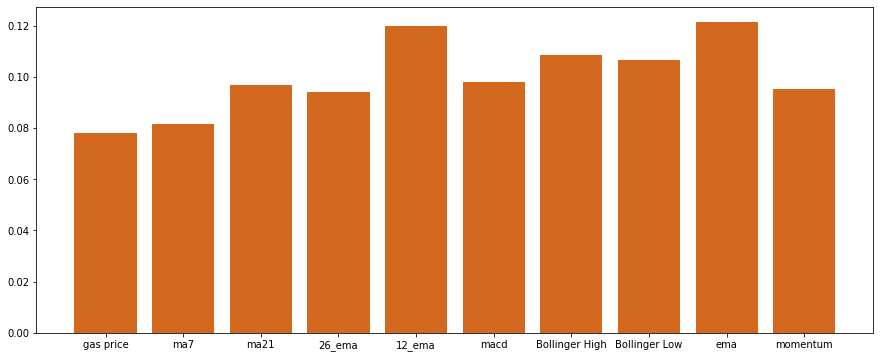

In [32]:
fig = plt.figure(figsize=(15,6))
plt.xticks(rotation='horizontal')
plt.bar([i for i in range(len(xgbmodel.feature_importances_))], xgbmodel.feature_importances_.tolist(), 
        tick_label=X_test.columns, color="chocolate")
plt.show()

### k-fold Cross Validation using XGBoost

In [26]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [27]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(data_dmatrix, params=params, nfold=5, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

TypeError: cv() got multiple values for argument 'params'

In [128]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.499297,0.000086,0.499626,0.000101
1,0.498769,0.000159,0.499306,0.000159
2,0.498206,0.000177,0.499087,0.000211
3,0.497744,0.000255,0.498919,0.000284
4,0.497288,0.000315,0.498762,0.000329


In [129]:
print((cv_results["test-rmse-mean"]).tail(1))

9    0.498481
Name: test-rmse-mean, dtype: float64


### Fourier transforms for trend analysis
Fourier transforms take a function and create a series of sine waves (with different amplitudes and frames). When combined, these sine waves approximate the original function. We will use Fourier transforms to extract global and local trends in the gas price, and to also denoise it a little.

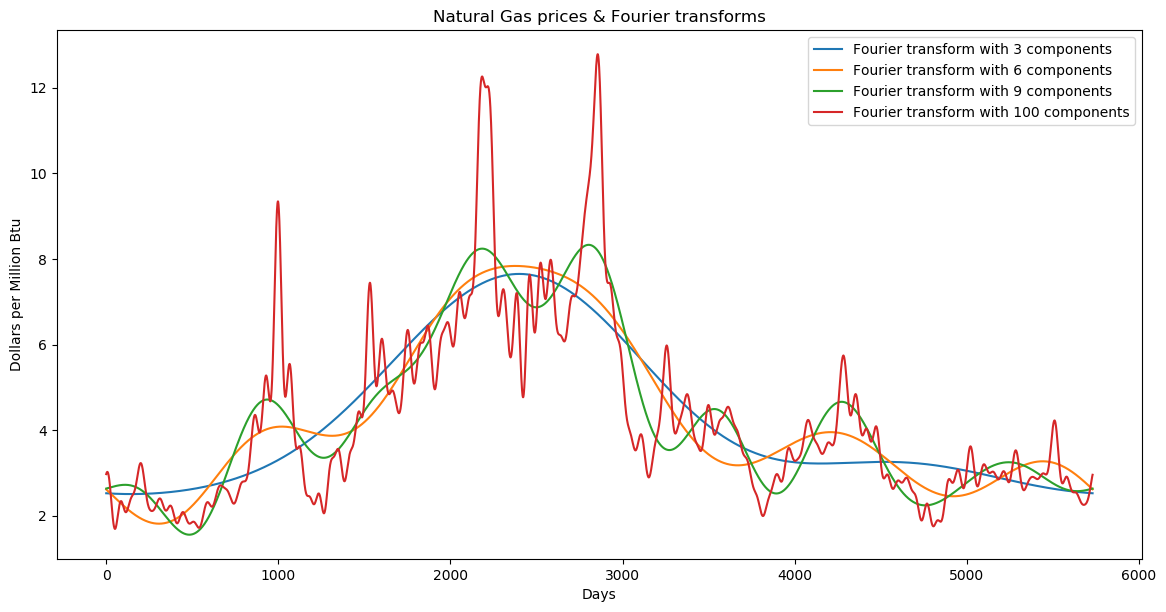

In [45]:
ng_fft = np.fft.fft(np.asarray(df['gas price'].tolist()))
fft_df = pd.DataFrame({'fft':ng_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

plt.xlabel('Days')
plt.ylabel('Dollars per Million Btu')
plt.title('Natural Gas prices & Fourier transforms')
plt.legend()
plt.show()

As we see the more components from the Fourier transform we use the closer the approximation function is to the real stock price (the 100 components transform is almost identical to the original function). We use Fourier transforms for the purpose of extracting long- and short-term trends so we will use the transforms with 3, 6, and 9 components. We can infer that the transform with 3 components serves as the long term trend.

In [48]:
fft_df.head()

,fft,absolute,angle
0,(24472.960000000036+0j),24472.960000,0.000000
1,(-5682.244155942201-2673.436452614165j),6279.742122,-2.701831
2,(944.258090488761+2656.968874861269j),2819.770725,1.229329
3,(-520.3591376848682-1306.2458526570879j),1406.076762,-1.949890
4,(300.29718308335106+1139.385320448288j),1178.294236,1.313096
